In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
auctions = pd.read_csv('auctions.csv.gzip', compression = 'gzip', dtype = {'auction_type_id':'object', 'country': np.float32, 'date': 'object', 'device_id': np.float32, 'platform' :'category', 'ref_type_id':'category', 'source_id':'category'})

In [4]:
del auctions['country']

In [6]:
auctions.index

RangeIndex(start=0, stop=19571319, step=1)

In [5]:
auctions['auction_type_id'].isnull().sum()

19571319

In [6]:
#auction_type_id tiene todas las filas nulas. Entonces se borra
del auctions['auction_type_id']

In [5]:
#Platform indica el SO y tiene dos valores (Android y iOS)
#La tomo como category
auctions['platform'].value_counts()
auctions['platform'] = auctions['platform'].astype('category')

In [7]:
#Source_id indica de dónde viene la subasta. Tiene 5 valores
#Lo tomo como category
auctions['source_id'].value_counts()
auctions['source_id'] = auctions['source_id'].astype('category')

In [7]:
#Tomo la columna date como datetime
auctions.loc[:,'date'] = pd.to_datetime(auctions['date'], errors = 'coerce')

In [9]:
#ref_type_id tiene 2 valores. Lo tomo como category
auctions['ref_type_id'].value_counts()
auctions['ref_type_id'] = auctions['ref_type_id'].astype('category')

In [10]:
auctions.dtypes

date           datetime64[ns]
device_id             float32
platform             category
ref_type_id          category
source_id            category
dtype: object

In [11]:
#A partir de ahora busco cuántas subastas se hicieron por día y lo grafico

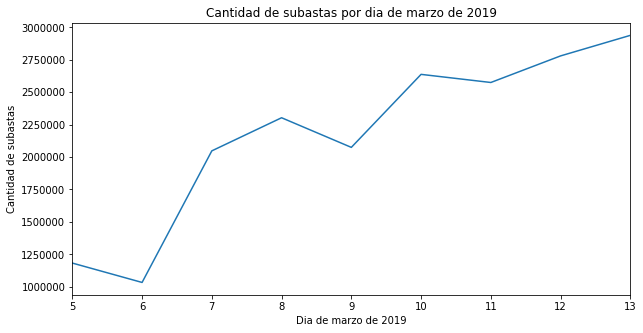

In [12]:
subastas_por_dia = auctions['date'].dt.day.value_counts()
subastas_por_dia.sort_index().plot(figsize = (10,5))
plt.title('Cantidad de subastas por dia de marzo de 2019')
plt.xlabel('Dia de marzo de 2019')
plt.ylabel('Cantidad de subastas')
plt.show()

In [13]:
#Ahora busco cuantas subastas hay por dia para cada SO

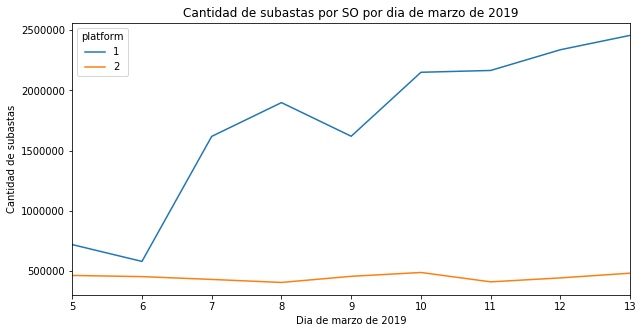

In [14]:
subastas_por_so_por_dia = auctions[['date', 'platform']].groupby([auctions['date'].dt.day]).agg({'platform':'value_counts'})
subastas_por_so_por_dia['platform'].unstack().plot(figsize = (10, 5))
plt.title('Cantidad de subastas por SO por dia de marzo de 2019')
plt.xlabel('Dia de marzo de 2019')
plt.ylabel('Cantidad de subastas')
plt.show()

In [15]:
#Ahora busco y grafico cuantas subastas se hacen por hora del dia

In [16]:
subastas_por_hora = auctions['date'].dt.hour.value_counts()
subastas_por_hora

2     1388464
1     1371091
23    1173841
22    1108219
3     1027541
21    1015053
0     1005716
19     994381
18     989528
17     967539
16     941866
20     933318
15     883824
14     805579
12     748935
13     741996
4      716194
11     627907
10     494726
5      487243
9      329604
6      325730
8      247915
7      245109
Name: date, dtype: int64

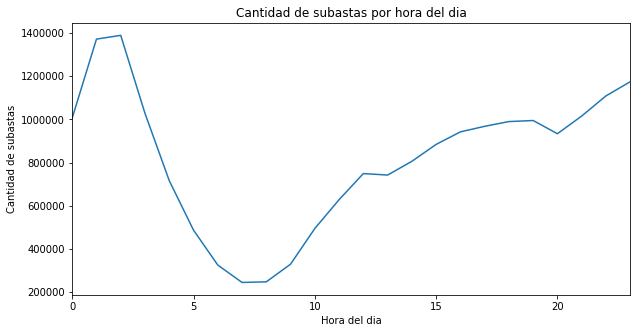

In [17]:
subastas_por_hora = auctions['date'].dt.hour.value_counts()
subastas_por_hora.sort_index().plot(figsize = (10,5))
plt.title('Cantidad de subastas por hora del dia')
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de subastas')
plt.show()

In [18]:
#Ahora busco cantidad de subastas por SO por hora del dia

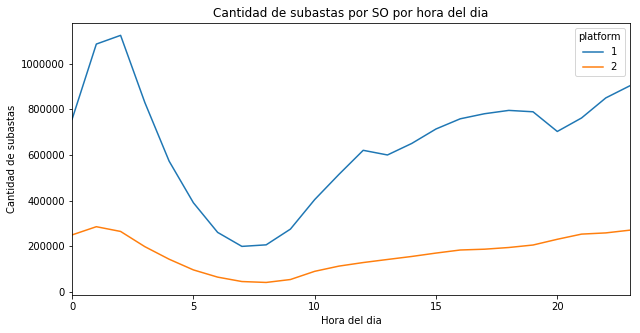

In [19]:
app = auctions[['date', 'platform']].groupby([auctions['date'].dt.hour]).agg({'platform':'value_counts'})
app['platform'].unstack().plot(figsize = (10, 5))
plt.title('Cantidad de subastas por SO por hora del dia')
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de subastas')
plt.show()

In [20]:
#Busco la cantidad de subastas por SO

In [21]:
subastas_por_dispositivos = auctions['platform'].value_counts()
subastas_por_dispositivos

1    15541825
2     4029494
Name: platform, dtype: int64

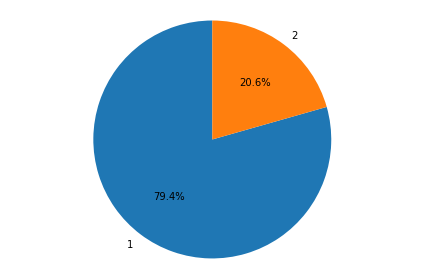

In [22]:
labels = sorted(set(auctions['platform'].values))
sizes = auctions['platform'].value_counts()
explode = (0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', startangle = 90)
ax1.axis('equal')
plt.tight_layout()
plt.show()

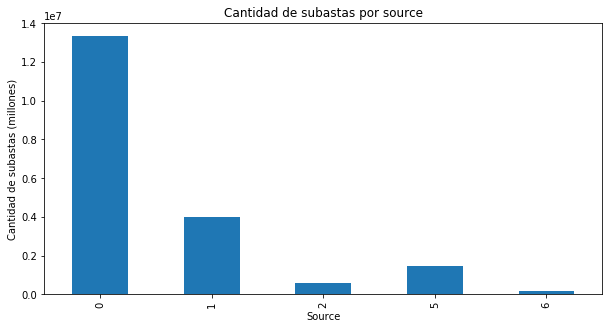

In [23]:
subastas_por_source = auctions['source_id'].value_counts()
subastas_por_source.sort_index().plot(kind = 'bar', figsize = (10,5))
plt.title('Cantidad de subastas por source')
plt.xlabel('Source')
plt.ylabel('Cantidad de subastas (millones)')
plt.show()

In [24]:
auctions.count()

date           19571319
device_id      19571319
platform       19571319
ref_type_id    19571319
source_id      19571319
dtype: int64

In [25]:
auctions.index

RangeIndex(start=0, stop=19571319, step=1)

In [26]:
auctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [71]:
#Busco la cantidad de devices por sistema operativo

In [72]:
auctions.head()

,date,device_id,platform,ref_type_id,source_id
0,2019-03-11 14:18:33.290763,6.059599e+18,1,1,0
1,2019-03-11 14:18:34.440157,1.115995e+18,1,1,0
2,2019-03-11 14:18:35.862360,7.463856e+18,1,1,0
3,2019-03-11 14:18:36.167163,7.829815e+18,1,1,0
4,2019-03-11 14:18:37.728590,1.448534e+18,1,1,0


In [85]:
auctions['device_id'].value_counts().count()

206171

In [102]:
auctions_reduced = auctions[['device_id', 'platform', 'ref_type_id']]

In [103]:
auctions_reduced['device_id'].value_counts().count()

206171

In [108]:
gp = auctions_reduced.groupby(['platform', 'device_id'], as_index = True)

In [ ]:
gp